In [73]:
from google_play_scraper import app, reviews, Sort
import pandas as pd
import wordcloud
from datetime import datetime
import matplotlib.pyplot as plt
from konlpy.tag import Okt
import numpy as np
# 앱 정보 가져오기
package_name = "com.velox.hkmc_tm1k"  # 패키지 이름

app_info = app(package_name)
print("앱 이름:", app_info['title'])


앱 이름: 현대 블루링크


In [4]:
app_review = {
    'pos' : {
        'review' : [],
        'score' : [],
        'app_version' : [],
        'at' : [],
    },
    'neutral' : {
        'review' : [],
        'score' : [],
        'app_version' : [],
        'at' : [],
    },
    'neg' : {
        'review' : [],
        'score' : [],
        'app_version' : [],
        'at' : [],
    }            
}

In [5]:
# 앱 리뷰 가져오기 - 5점 리뷰
continuation_token=None
for i in range(2):
    reviews_result, continuation_token = reviews(
        package_name,
        lang='ko',  # 한국어
        country='kr',  # 한국 사용자
        # sort=Sort.NEWEST,
        count=200,  # 가져올 리뷰 수
        filter_score_with=5,  # 특정 평점 필터링 (None: 모든 평점)
        continuation_token=continuation_token
    )
    for review in reviews_result:
        app_review['pos']['review'].append(review['content'])
        app_review['pos']['score'].append(review['score'])
        app_review['pos']['app_version'].append(review['reviewCreatedVersion'])
        app_review['pos']['at'].append(review['at'])
    

In [6]:
# 앱 리뷰 가져오기 - 3, 4점 리뷰
continuation_token=None
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=4,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neutral']['review'].append(review['content'])
    app_review['neutral']['score'].append(review['score'])
    app_review['neutral']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neutral']['at'].append(review['at'])

continuation_token=None
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=3,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neutral']['review'].append(review['content'])
    app_review['neutral']['score'].append(review['score'])
    app_review['neutral']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neutral']['at'].append(review['at'])        

In [7]:
# 앱 리뷰 가져오기 - 1, 2점 리뷰
continuation_token=None

reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=1,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neg']['review'].append(review['content'])
    app_review['neg']['score'].append(review['score'])
    app_review['neg']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neg']['at'].append(review['at'])

continuation_token=None
       
reviews_result, continuation_token = reviews(
    package_name,
    lang='ko',  # 한국어
    country='kr',  # 한국 사용자
    # sort=Sort.NEWEST,
    count=200,  # 가져올 리뷰 수
    filter_score_with=2,  # 특정 평점 필터링 (None: 모든 평점)
    continuation_token=continuation_token
)
for review in reviews_result:
    app_review['neg']['review'].append(review['content'])
    app_review['neg']['score'].append(review['score'])
    app_review['neg']['app_version'].append(review['reviewCreatedVersion'])
    app_review['neg']['at'].append(review['at'])        

In [8]:
print(len(app_review['pos']['score']))
print(len(app_review['neutral']['score']))
print(len(app_review['neg']['score']))

400
400
400


In [9]:
pos_review = pd.DataFrame(app_review['pos'])
neutral_review = pd.DataFrame(app_review['neutral'])
neg_review = pd.DataFrame(app_review['neg'])


In [10]:
font_path='/Users/admin/Downloads/D2Coding-Ver1.3.2-20180524/D2Coding/D2Coding-Ver1.3.2-20180524.ttf'

In [11]:
okt = Okt()

In [12]:
stopwords = []
with open("stopwords.txt", "r", encoding="utf-8") as file:
    stopwords = file.read().splitlines()
    # word_list = [line.strip() for line in file] <-- use this if the file is tooooo large to load
stopwords.append('블루링크')
stopwords.append('블루  링크')
stopwords.append('블루')
stopwords.append('링크')

## 처리 서순이 매우 중요!!
- 먼저 텍스트를 품사별로 쪼개야 개별 단어에 대해 불용어 처리가 가능함
  1. 품사 쪼개기
  2. 불용어 처리

In [13]:
def remove_stopwords(text:str):
    tokens = okt.nouns(text)
    # tokens = text.split(' ')
    stops = stopwords
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [14]:
# list(filter(lambda x: len(x)==1, neg_dict.keys()))
neg_review['review'] = neg_review['review'].map(remove_stopwords)
neg_words = list(neg_review['review'])

In [15]:
pos_review['review'] = pos_review['review'].map(remove_stopwords)
pos_words = list(pos_review['review'])

In [16]:
neutral_review['review'] = neutral_review['review'].map(remove_stopwords)
neutral_words = list(neutral_review['review'])

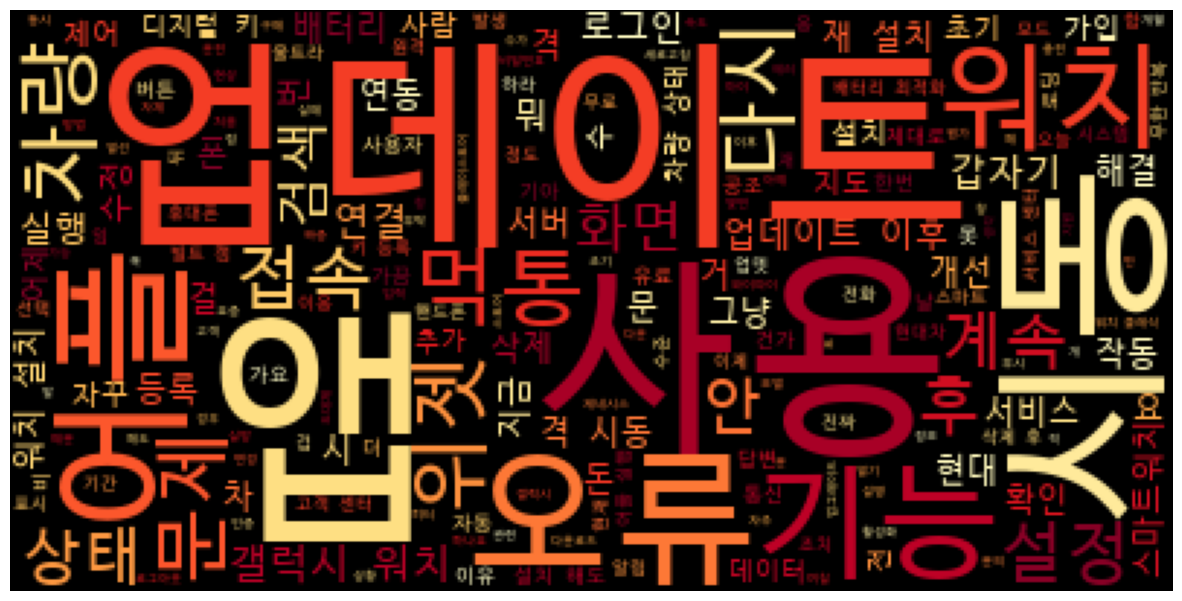

In [17]:
neg_cloud = wordcloud.WordCloud(font_path=font_path, colormap='YlOrRd', max_words=200).generate(' '.join(list(neg_words)))
neg_dict = neg_cloud.words_
plt.figure(figsize=(15,10))
plt.imshow(neg_cloud)   # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
plt.axis('off')  #눈금 삭제 
plt.show()

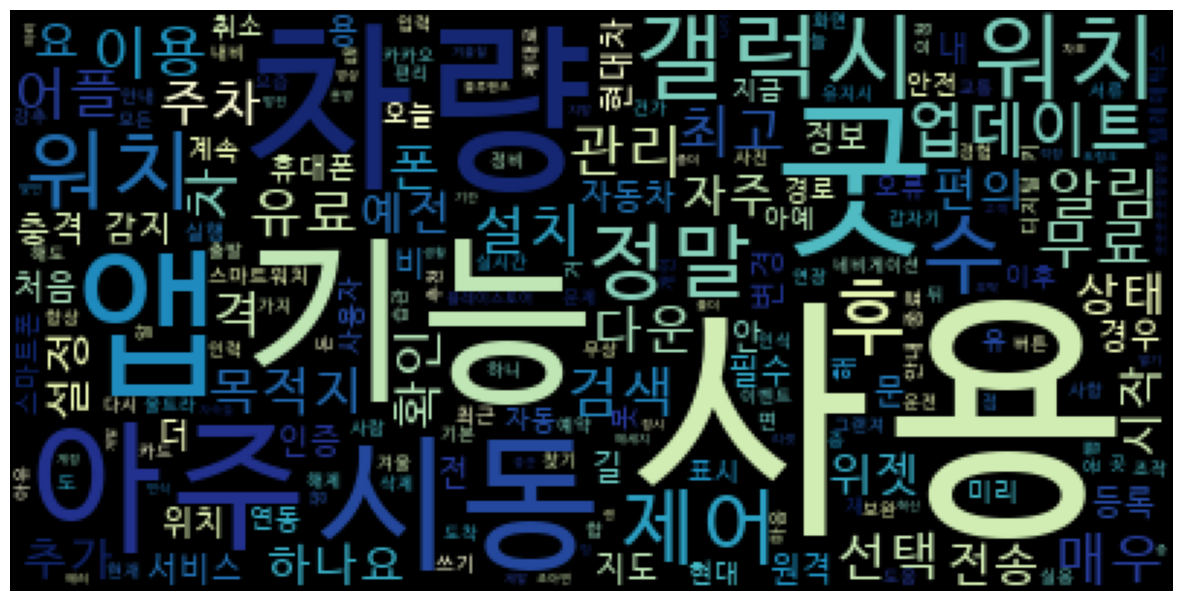

In [ ]:
pos_cloud = wordcloud.WordCloud(font_path=font_path, colormap='YlGnBu', max_words=200).generate(' '.join(list(pos_words)))
pos_dict = pos_cloud.words_
plt.figure(figsize=(15,10))
plt.imshow(pos_cloud)   # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
plt.axis('off')  #눈금 삭제 
plt.show()

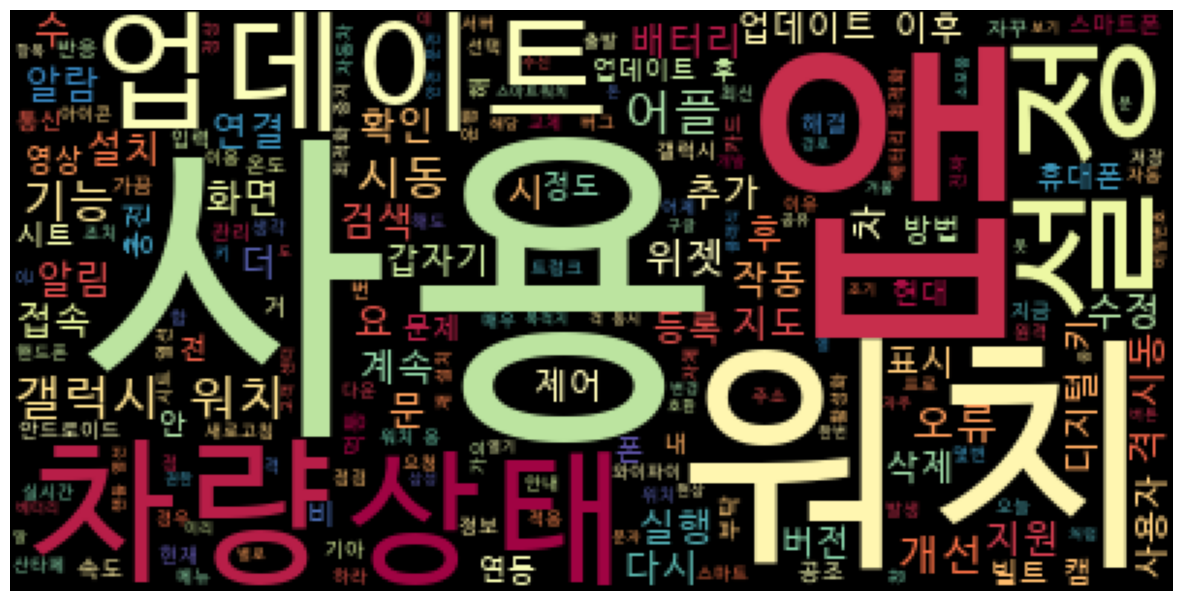

In [19]:
neutral_cloud = wordcloud.WordCloud(font_path=font_path, colormap='Spectral', max_words=200).generate(' '.join(list(neutral_words)))
neutral_dict = neg_cloud.words_
plt.figure(figsize=(15,10))
plt.imshow(neutral_cloud)   # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
plt.axis('off')  #눈금 삭제 
plt.show()

In [ ]:
keyset = set(pos_dict.keys()) | set(neg_dict.keys()) | set(neutral_dict.keys()) # 309 words

In [26]:
common_key = set(pos_dict.keys()) & set(neg_dict.keys()) # 91 words

In [92]:
diff_senti = {}
for c in common_key:
    print(f"Pos: {round(pos_dict[c] ,4)}\t Neg: {round(neg_dict[c], 4)}\tWord: {c}\t ")
    diff_senti[c] = abs(pos_dict[c] - neg_dict[c])

Pos: 0.0615	 Neg: 0.25	Word: 안	 
Pos: 0.1077	 Neg: 0.119	Word: 설치	 
Pos: 0.0308	 Neg: 0.0952	Word: 건가	 
Pos: 0.0154	 Neg: 0.0476	Word: 부탁	 
Pos: 0.0769	 Neg: 0.2738	Word: 설정	 
Pos: 0.2615	 Neg: 0.5238	Word: 시동	 
Pos: 0.0308	 Neg: 0.25	Word: 화면	 
Pos: 0.0615	 Neg: 0.1786	Word: 등록	 
Pos: 0.0154	 Neg: 0.0476	Word: 에러	 
Pos: 0.0615	 Neg: 0.0714	Word: 용	 
Pos: 0.0615	 Neg: 0.0476	Word: 정보	 
Pos: 0.0923	 Neg: 0.1667	Word: 폰	 
Pos: 0.0154	 Neg: 0.0595	Word: 열기	 
Pos: 0.0462	 Neg: 0.0714	Word: 재	 
Pos: 0.0462	 Neg: 0.1429	Word: 스마트워치	 
Pos: 0.0615	 Neg: 0.0952	Word: 더	 
Pos: 0.0923	 Neg: 0.0714	Word: 선택	 
Pos: 0.0615	 Neg: 0.0476	Word: 변경	 
Pos: 0.0308	 Neg: 0.1905	Word: 돈	 
Pos: 0.1692	 Neg: 0.119	Word: 수	 
Pos: 0.0308	 Neg: 0.1071	Word: 제대로	 
Pos: 0.2	 Neg: 0.25	Word: 갤럭시 워치	 
Pos: 0.0308	 Neg: 0.0476	Word: 합	 
Pos: 0.0769	 Neg: 0.25	Word: 상태	 
Pos: 0.0769	 Neg: 0.3333	Word: 위젯	 
Pos: 0.0308	 Neg: 0.131	Word: 삭제	 
Pos: 0.0462	 Neg: 0.0952	Word: 못	 
Pos: 0.0308	 Neg: 0.0714	Word: 뒤	 
Pos: 0.1

In [93]:
diff_avg = np.average(list(diff_senti.values()))
print("diff_avg: ", diff_avg)
diff_std = np.std(list(diff_senti.values()))
print("diff_std: ", diff_std)


diff_avg:  0.09541722014249485
diff_std:  0.12038596045287611


In [94]:
diff_senti = {k : v for k, v in diff_senti.items() if abs(pos_dict[k] - neg_dict[k]) <= (diff_avg + diff_std)}
diff_senti

{'안': 0.18846153846153846,
 '설치': 0.011355311355311343,
 '건가': 0.06446886446886446,
 '부탁': 0.03223443223443223,
 '설정': 0.1968864468864469,
 '등록': 0.11703296703296703,
 '에러': 0.03223443223443223,
 '용': 0.009890109890109883,
 '정보': 0.013919413919413925,
 '폰': 0.07435897435897434,
 '열기': 0.044139194139194135,
 '재': 0.025274725274725268,
 '스마트워치': 0.09670329670329669,
 '더': 0.03369963369963369,
 '선택': 0.020879120879120888,
 '변경': 0.013919413919413925,
 '돈': 0.1597069597069597,
 '수': 0.0501831501831502,
 '제대로': 0.07637362637362637,
 '갤럭시 워치': 0.04999999999999999,
 '합': 0.016849816849816845,
 '상태': 0.17307692307692307,
 '삭제': 0.10018315018315019,
 '못': 0.049084249084249076,
 '뒤': 0.040659340659340654,
 '차': 0.05897435897435896,
 '실행': 0.16813186813186812,
 '인증': 0.0020146520146520214,
 '전': 0.0575091575091575,
 '사람': 0.10018315018315019,
 '검색': 0.1423076923076923,
 '해도': 0.02875457875457875,
 '사용자': 0.049084249084249076,
 '자주': 0.017399267399267407,
 '이용': 0.039743589743589755,
 '하나요': 0.017

### Mutual Exclusivity Filter:
특정 단어가 감성 간 공통 등장하지만, 출현 빈도 차이가 
Threshold>X% 이상이면 유지.

In [95]:
pos_pure = {}
for k, v in pos_dict.items():
    if k not in diff_senti: #common_key:
        print(f"{k} : {round(v, 4)}")
        pos_pure[k] = v

사용 : 1.0
굿 : 0.3538
앱 : 0.3231
시동 : 0.2615
아주 : 0.2462
워치 : 0.1692
정말 : 0.1538
업데이트 : 0.1385
관리 : 0.1231
매우 : 0.1077
최고 : 0.1077
어플 : 0.1077
주차 : 0.0923
목적지 : 0.0923
전송 : 0.0769
편의 : 0.0769
예전 : 0.0769
위젯 : 0.0769
시작 : 0.0769
충격 감지 : 0.0769
자동차 : 0.0615
내 : 0.0615
필수 : 0.0615
길 : 0.0615
위치 : 0.0615
경로 : 0.0462
취소 : 0.0462
유 : 0.0462
오류 : 0.0462
미리 : 0.0462
계속 : 0.0462
스마트폰 : 0.0462
안전 : 0.0462
텔레매틱스 : 0.0462
도 : 0.0462
쓰기 : 0.0462
면 : 0.0462
최근 : 0.0462
안내 종료 : 0.0462
연장 : 0.0308
요청 : 0.0308
해제 : 0.0308
도착 : 0.0308
알 : 0.0308
이벤트 : 0.0308
화면 : 0.0308
보완 : 0.0308
겨울 : 0.0308
네비게이션 : 0.0308
무상 : 0.0308
카카오 : 0.0308
그랜져 : 0.0308
개인 : 0.0308
조작 : 0.0308
운행 : 0.0308
점 : 0.0308
인식 : 0.0308
사항 : 0.0308
모든 : 0.0308
추천 : 0.0308
카드 : 0.0308
맵 : 0.0308
안내 : 0.0308
교통 : 0.0308
다시 : 0.0308
곳 : 0.0308
문제 : 0.0308
늘 : 0.0308
하니 : 0.0308
항상 : 0.0308
습관 : 0.0308
찾기 : 0.0308
가지 : 0.0308
기본 : 0.0308
실시간 : 0.0308
정비 : 0.0308
강추 : 0.0308
출발 : 0.0308
사진 : 0.0308
종 : 0.0308
아유 : 0.0308
도움 : 0.0308
실용 : 0.030

In [96]:
neg_pure = {}
for k, v in neg_dict.items():
    if k not in diff_senti: #common_key:
        print(f"{k} : {round(v, 4)}")
        neg_pure[k] = v

앱 : 1.0
업데이트 : 0.7857
사용 : 0.6905
시동 : 0.5238
오류 : 0.4524
어플 : 0.4405
워치 : 0.4167
먹통 : 0.381
위젯 : 0.3333
다시 : 0.3214
문제 : 0.2976
접속 : 0.2976
계속 : 0.2738
화면 : 0.25
연결 : 0.2262
업데이트 이후 : 0.2262
로그인 : 0.2143
뭐 : 0.2143
재 설치 : 0.1905
작동 : 0.1786
서버 : 0.1786
배터리 : 0.1786
격 시동 : 0.1786
번 : 0.1548
워치 설치 : 0.1548
해결 : 0.1429
개선 : 0.1429
시 : 0.1429
걸 : 0.131
수정 : 0.131
그냥 : 0.131
가입 : 0.131
자꾸 : 0.131
초기 : 0.131
어제 : 0.119
데이터 : 0.119
차량 상태 : 0.119
설치 해도 : 0.119
로딩 : 0.1071
한번 : 0.1071
기아 : 0.1071
공조 : 0.0952
가끔 : 0.0952
가요 : 0.0952
통신 : 0.0952
답변 : 0.0952
날 : 0.0952
이유 : 0.0952
배터리 최적화 : 0.0952
함 : 0.0833
업뎃 : 0.0833
하라 : 0.0833
진짜 : 0.0833
발생 : 0.0833
겁 : 0.0833
빌트 캠 : 0.0833
삭제 후 : 0.0833
고객 센터 : 0.0833
어플 실행 : 0.0833
핸드폰 : 0.0714
시스템 : 0.0714
이제 : 0.0714
수준 : 0.0714
정도 : 0.0714
모드 : 0.0714
임 : 0.0714
조치 : 0.0714
스마트 : 0.0714
전화 : 0.0714
키 등록 : 0.0714
무한 반복 : 0.0714
서비스 센터 : 0.0714
워치 클래식 : 0.0714
말 : 0.0595
창 : 0.0595
갤럭시 : 0.0595
열선 : 0.0595
적 : 0.0595
조기 : 0.0595
활성화 : 0.0595
분 : 0.0595
제

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

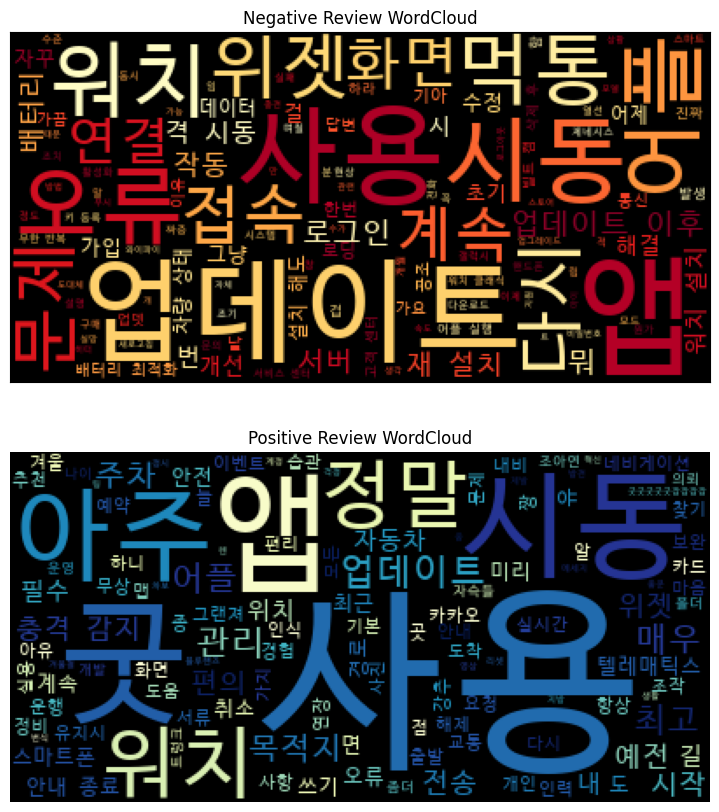

In [97]:
fig, axs = plt.subplots(2,1, figsize=(15,10))
neg_cloud_pure = wordcloud.WordCloud(font_path=font_path, colormap='YlOrRd', max_words=200).generate_from_frequencies(neg_pure)
pos_cloud_pure = wordcloud.WordCloud(font_path=font_path, colormap='YlGnBu', max_words=200).generate_from_frequencies(pos_pure)
# plt.figure(figsize=(15,10))
axs[0].imshow(neg_cloud_pure)
axs[0].yaxis.set_visible(False)
axs[0].xaxis.set_visible(False)
axs[0].set_title("Negative Review WordCloud")

axs[1].imshow(pos_cloud_pure)# wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
axs[1].yaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[1].set_title("Positive Review WordCloud")
plt.axis('off')  #눈금 삭제 
# plt.show()

[('정말', 'Noun'), ('굿', 'Noun')]